**<span style="font-size:27px;">Analyzing Customer Segments and Sales Drivers in Retail Data</span>**

**<span style="font-size:24px;">Goal</span>**

*<span style="font-size:16px;">Understanding customer behavior is essential in retail. My goal is to identify customer segments based on purchasing behavior and provide insights to the Category Manager for Chips. By analyzing transaction and customer data, I aim to uncover distinct customer personas and preferences in the chip category. Through segmentation and strategic planning, I collaborate to devise targeted marketing strategies and optimize product offerings. With ongoing analysis and adaptation, I ensure my approach remains responsive to evolving consumer trends, driving success in the competitive retail landscape.
</span>*

**<span style="font-size:24px;">Setup</span>**

**<span style="font-size:18px;">Importing the necessary libraries I will use for this project</span>**

In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings('ignore')

**<span style="font-size:18px;">Reading in the data</span>**

In [188]:
dft = pd.read_excel("C:/Users/Yelyzaveta/Downloads/QVI_transaction_data.xlsx")


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


**<span style="font-size:18px;">Looking at the data</span>**

In [ ]:
dft.head()

In [189]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [190]:
dfc = pd.read_csv("C:/Users/Yelyzaveta/Downloads/QVI_purchase_behaviour.csv")
dfc.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [191]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


**<span style="font-size:24px;">Data cleaning</span>**

**<span style="font-size:18px;">Checking for missing data</span>**

In [192]:
dft.isna().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [193]:
dfc.isna().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

**<span style="font-size:18px;">Removing null values from the data</span>**

In [194]:
dft = dft.dropna()
dfc = dfc.dropna()

**<span style="font-size:18px;">Dropping duplicates</span>**

In [195]:
dft.drop_duplicates()
dfc.drop_duplicates()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


**<span style="font-size:18px;">Checking the data type of the columns</span>**

In [196]:
print(dft.dtypes)

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object


In [197]:
print(dfc.dtypes)

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object


**<span style="font-size:18px;">Changing the data type of columns</span>**

In [198]:
dft['DATE'] = pd.to_datetime(dft['DATE'],  origin='1899-12-30', unit='D')

**<span style="font-size:18px;">Checking for Outliers</span>**

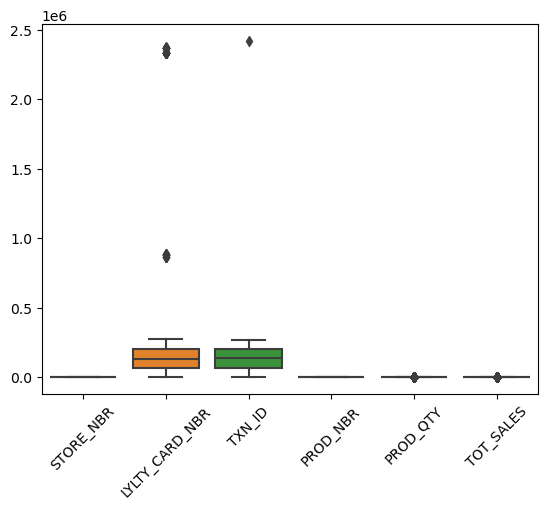

In [199]:
sns.boxplot(data=dft)
plt.xticks(rotation=45) 
plt.show()

<Axes: >

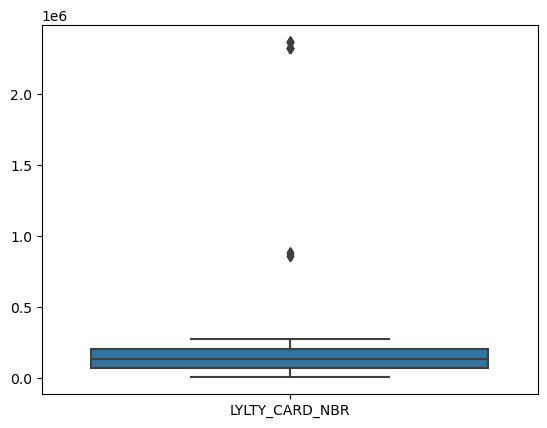

In [200]:
sns.boxplot(data=dfc)

**<span style="font-size:18px;">Removing Outliers</span>**

In [201]:
columns_of_interest=['LYLTY_CARD_NBR','TXN_ID']
subset_dft = dft[columns_of_interest]
Q1 = subset_dft.quantile(0.25)
Q3 = subset_dft.quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (subset_dft < lower_bound) | (subset_dft > upper_bound)

# Check if any outliers were found
if outliers.any().any():
# Drop outliers
    dft_cleaned = dft[~outliers.any(axis=1)]
    print("Original DataFrame shape:", dft.shape)
    print("Cleaned DataFrame shape:", dft_cleaned.shape)
else:
    print("No outliers found. DataFrame shape remains unchanged.")



Original DataFrame shape: (264836, 8)
Cleaned DataFrame shape: (264791, 8)


In [202]:
subset_dfc = dfc['LYLTY_CARD_NBR']
Q1 = subset_dfc.quantile(0.25)
Q3 = subset_dfc.quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (subset_dfc < lower_bound) | (subset_dfc > upper_bound)
# Check if any outliers were found
if outliers.any().any():
    # Drop outliers
    dfc_cleaned = dfc[~outliers]
    # Verify that outliers are removed
    print("Original DataFrame shape:", dfc.shape)
    print("Cleaned DataFrame shape:", dfc_cleaned.shape)
else:
    print("No outliers found. DataFrame shape remains unchanged.")


Original DataFrame shape: (72637, 3)
Cleaned DataFrame shape: (72603, 3)


**<span style="font-size:18px;">Summarising the individual words in the product name</span>**

In [203]:
unique_prod = dft['PROD_NAME'].unique()
prod_words=[]
for prod in unique_prod:
       prod_words.extend(prod.split())
prod_words_df = pd.DataFrame(prod_words, columns=['words'])
prod_words_df.head(20)


,words
0,Natural
1,Chip
2,Compny
3,SeaSalt175g
4,CCs
5,Nacho
6,Cheese
7,175g
8,Smiths
9,Crinkle


In [204]:
# Remove words containing digits and special characters
cleaned_prod_words = [word for word in prod_words if not bool(re.search(r'[\d&]', word))]

# Count the frequency of each word
word_counts = Counter(cleaned_prod_words)

# Sort words by frequency of occurrence
sorted_words_by_frequency = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# Display sorted words by frequency of occurrence
for word, count in sorted_words_by_frequency:
    print(f'{word}: {count}')

Chips: 21
Smiths: 16
Crinkle: 14
Cut: 14
Kettle: 13
Cheese: 12
Salt: 12
Original: 10
Chip: 9
Salsa: 9
Doritos: 9
Corn: 8
Pringles: 8
RRD: 8
Chicken: 7
WW: 7
Sour: 6
Sea: 6
Thinly: 5
Vinegar: 5
Chilli: 5
Thins: 5
Crisps: 5
Natural: 4
Cream: 4
Red: 4
Rock: 4
Deli: 4
Supreme: 4
Infuzions: 4
CCs: 3
Tortilla: 3
Old: 3
El: 3
Paso: 3
Dip: 3
Tomato: 3
Mild: 3
Sweet: 3
Sensations: 3
Lime: 3
Twisties: 3
Soy: 3
Cobs: 3
Popd: 3
Woolworths: 3
Tostitos: 3
Nacho: 2
Grain: 2
Waves: 2
Tangy: 2
Burger: 2
Rings: 2
Chives: 2
Cheezels: 2
And: 2
Thai: 2
BBQ: 2
SR: 2
Swt: 2
French: 2
ChipCo: 2
Smith: 2
Honey: 2
Tyrrells: 2
Lightly: 2
Salted: 2
Medium: 2
Potato: 2
Cheetos: 2
Compny: 1
Chili: 1
Mexican: 1
Jalapeno: 1
Siracha: 1
NCC: 1
Garden: 1
Southern: 1
Box: 1
Infzns: 1
Crn: 1
Crnchers: 1
Gcamole: 1
Sthrn: 1
FriedChicken: 1
Mzzrlla: 1
Originl: 1
saltd: 1
Sp: 1
Truffle: 1
Mexicana: 1
OnionDip: 1
Hony: 1
Dorito: 1
Chp: 1
Roast: 1
Mozzarella: 1
Basil: 1
Pesto: 1
SweetChili: 1
PotatoMix: 1
Camembert: 1
Fig: 1
M

*<span style="font-size:16px;">There are salsa products in the dataset but we are only interested in the chips
category, so let's remove these</span>*

In [205]:
dft['SALSA'] = dft['PROD_NAME'].str.lower().str.contains('salsa')
dft = dft[dft['SALSA'] == False]
dft.drop(columns=['SALSA'], inplace=True)

*<span style="font-size:16px;">Let's look at the number of transaction lines over time to see if there are any obvious data issues such as missing data</span>*

In [206]:
dft.groupby('DATE').size()

DATE
2018-07-01    663
2018-07-02    650
2018-07-03    674
2018-07-04    669
2018-07-05    660
             ... 
2019-06-26    657
2019-06-27    669
2019-06-28    673
2019-06-29    703
2019-06-30    704
Length: 364, dtype: int64

*<span style="font-size:16px;">There's only 364 rows, meaning only 364 dates which indicates a missing date. Let's
create a sequence of dates from 1 Jul 2018 to 30 Jun 2019 and use this to create a
chart of number of transactions over time to find the missing date</span>*


In [207]:
# Define the start and end dates
start_date = '2018-07-01'
end_date = '2019-06-30'

# Create a sequence of dates from start_date to end_date
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# Create a DataFrame with the date range
date_df = pd.DataFrame(date_range, columns=['DATE'])

# Merge date_df with dft to fill in missing dates and count transactions by date
merged_df = pd.merge(date_df, dft.groupby('DATE').size().reset_index(name='transaction_count'), on='DATE', how='left')

# Fill NaN values in transaction_count column with 0
merged_df['transaction_count'].fillna(0, inplace=True)

print(merged_df)

          DATE  transaction_count
0   2018-07-01              663.0
1   2018-07-02              650.0
2   2018-07-03              674.0
3   2018-07-04              669.0
4   2018-07-05              660.0
..         ...                ...
360 2019-06-26              657.0
361 2019-06-27              669.0
362 2019-06-28              673.0
363 2019-06-29              703.0
364 2019-06-30              704.0

[365 rows x 2 columns]


**<span style="font-size:20px;">Visualizing the data</span>**

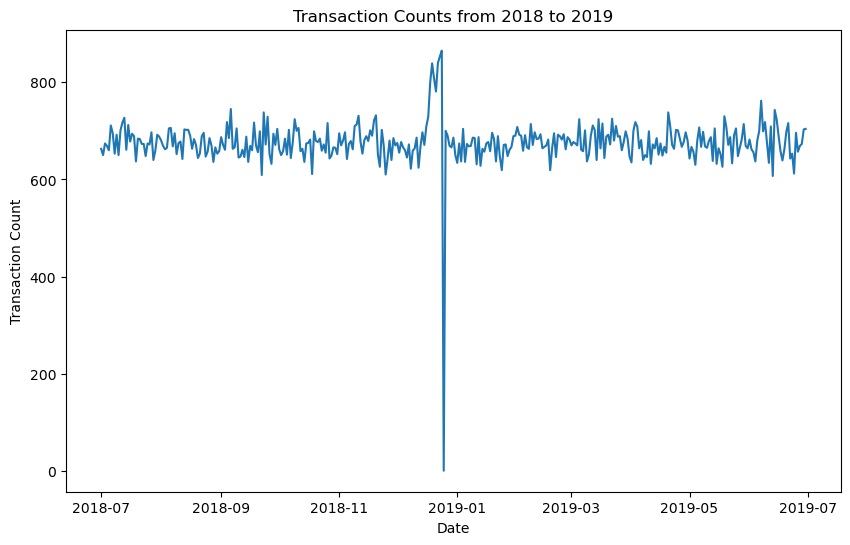

In [208]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_df, x='DATE',y='transaction_count')
plt.title('Transaction Counts from 2018 to 2019')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.show()

*<span style="font-size:16px;">We can see that there is an increase in purchases in December and a break in late December. Let's zoom in on this</span>*

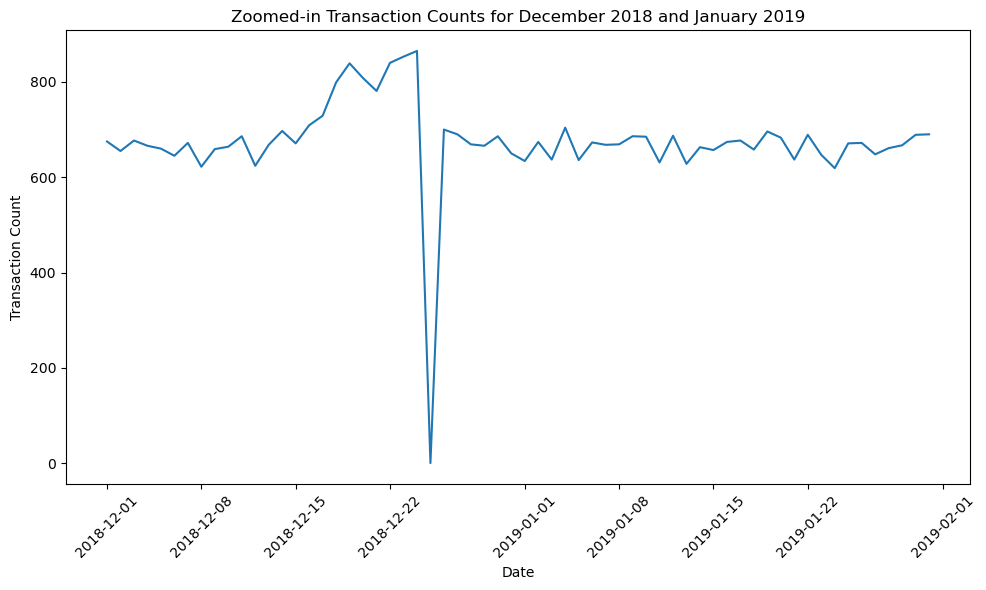

In [209]:

# Filter the DataFrame for the desired date range
start_zoom_date = '2018-12-01'
end_zoom_date = '2019-01-31'
zoomed_df = merged_df[(merged_df['DATE'] >= start_zoom_date) & (merged_df['DATE'] <= end_zoom_date)]

# Plot the zoomed-in part
plt.figure(figsize=(10, 6))
sns.lineplot(data=zoomed_df, x='DATE', y='transaction_count')
plt.title('Zoomed-in Transaction Counts for December 2018 and January 2019')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*<span style="font-size:16px;">We can see that the increase in sales occurs in the lead-up to Christmas and that there are zero sales on Christmas day itself. This is due to shops being closed on Christmas day</span>*


**<span style="font-size:20px;">Data exploration</span>**

*<span style="font-size:16px;">Looking into the pack size</span>*

In [210]:
def extract_digits(text):
    return re.findall(r'\d+', text)

# Extract pack sizes from the PROD_NAME column
dft['PACK_SIZE'] = dft['PROD_NAME'].apply(lambda x: int(extract_digits(x)[0]) if extract_digits(x) else None)

# Check if the pack sizes look sensible
pack_size_counts = dft['PACK_SIZE'].value_counts().sort_index()
print(pack_size_counts)

PACK_SIZE
70      1507
90      3008
110    22387
125     1454
134    25102
135     3257
150    40203
160     2970
165    15297
170    19983
175    66390
180     1468
190     2995
200     4473
210     6272
220     1564
250     3169
270     6285
330    12540
380     6418
Name: count, dtype: int64


*<span style="font-size:16px;">The largest size is 380g and the smallest size is 70g - seems sensible!</span>*


**<span style="font-size:20px;">Plotting a histogram showing the number of transactions by pack size</span>**

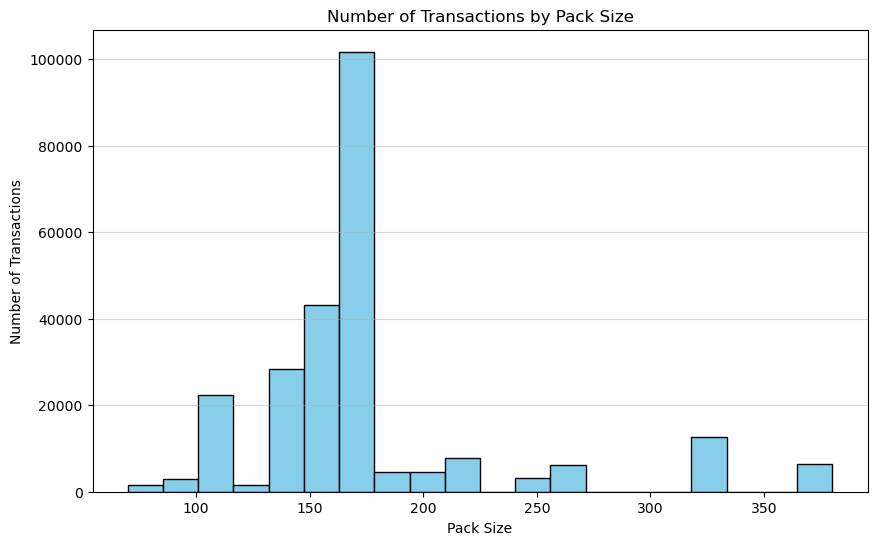

In [211]:
plt.figure(figsize=(10, 6))
plt.hist(dft['PACK_SIZE'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Number of Transactions by Pack Size')
plt.xlabel('Pack Size')
plt.ylabel('Number of Transactions')
plt.grid(axis='y', alpha=0.5)
plt.show()

*<span style="font-size:16px;">Looking into the brand</span>*

In [212]:
dft['BRAND'] = dft['PROD_NAME'].str.split().str[0]

# Check if the brands look reasonable
brand_counts = dft['BRAND'].value_counts()
print(brand_counts)

BRAND
Kettle        41288
Smiths        27390
Pringles      25102
Doritos       22041
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Tyrrells       6442
Grain          6272
Natural        6050
Cheezels       4603
CCs            4551
Red            4427
Dorito         3185
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
Woolworths     1516
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: count, dtype: int64


*<span style="font-size:16px;">Some of the brand names look like they are of the same brands - such as RED andRRD, which are both Red Rock Deli chips. Let's combine these together</span>*

In [213]:
# Clean brand names
dft['BRAND'].replace({'Red': 'RRD'}, inplace=True)
dft['BRAND'].replace({'Smith': 'Smiths'}, inplace=True)
dft['BRAND'].replace({'Infzns': 'Infuzions'}, inplace=True)
dft['BRAND'].replace({'WW': 'Woolworths'}, inplace=True)
dft['BRAND'].replace({'GrnWves': 'Grain'}, inplace=True)
dft['BRAND'].replace({'Snbts': 'Sunbites'}, inplace=True)
dft['BRAND'].replace({'Dorito': 'Doritos'}, inplace=True)
dft['BRAND'].replace({'Cobs': 'CCs'}, inplace=True)
dft['BRAND'].replace({'Natural': 'NCC'}, inplace=True)

# Check if the brands look reasonable after cleaning
brand_counts = dft['BRAND'].value_counts()
print(brand_counts)

BRAND
Kettle        41288
Smiths        30353
Doritos       25226
Pringles      25102
RRD           16321
CCs           14244
Infuzions     14201
Thins         14075
Woolworths    11836
Tostitos       9471
Twisties       9454
Grain          7740
NCC            7469
Tyrrells       6442
Cheezels       4603
Sunbites       3008
Cheetos        2927
Burger         1564
French         1418
Name: count, dtype: int64


**<span style="font-size:20px;">Merging transaction data to customer data</span>**


In [214]:
# Merge dft and dfc on the LYLTY_CARD_NBR column
merged_df = pd.merge(dft, dfc, on='LYLTY_CARD_NBR', how='left')

# Check the merged DataFrame
print(merged_df.head())

        DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 2018-10-17          1            1000       1         5   
1 2019-05-14          1            1307     348        66   
2 2019-05-20          1            1343     383        61   
3 2018-08-17          2            2373     974        69   
4 2018-08-18          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  PACK_SIZE  \
0    Natural Chip        Compny SeaSalt175g         2        6.0        175   
1                  CCs Nacho Cheese    175g         3        6.3        175   
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9        170   
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0        175   
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8        150   

    BRAND               LIFESTAGE PREMIUM_CUSTOMER  
0     NCC   YOUNG SINGLES/COUPLES          Premium  
1     CCs  MIDAGE SINGLES/COUPLES           Budget  

**<span style="font-size:18px;">Who spends the most on chips, describing customers by lifestage and how premium their general purchasing behaviour is?</span>**

In [215]:
merged_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).size().max()
# Group by LIFESTAGE and PREMIUM_CUSTOMER, and sum the TOTAL_SALES
total_sales_by_customer = merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum()

# Find the customer with the highest total sales
customer_with_highest_sales = total_sales_by_customer.idxmax()

# Display the customer with the highest total sales
print("Customer with the highest total sales:")
print(customer_with_highest_sales)

# Display the total sales for this customer
print("\nTotal sales for this customer:")
print(total_sales_by_customer.loc[customer_with_highest_sales])

Customer with the highest total sales:
('OLDER FAMILIES', 'Budget')

Total sales for this customer:
156863.75


**<span style="font-size:18px;">How many customers are in each segment?</span>**

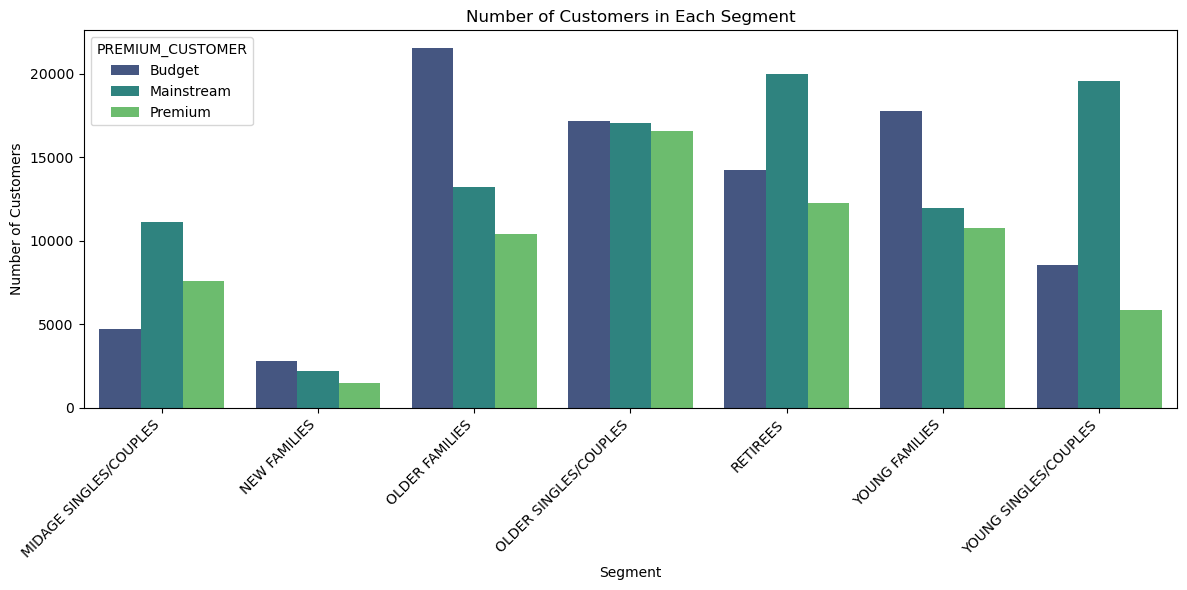

In [216]:

# Group the DataFrame by 'LIFESTAGE' and 'PREMIUM_CUSTOMER', and count the number of customers in each segment
customer_count_by_segment = merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).size().reset_index(name='CUSTOMER_COUNT')

# Plot the number of customers in each segment using sns.barplot
plt.figure(figsize=(12, 6))
sns.barplot(data=customer_count_by_segment, x='LIFESTAGE', y='CUSTOMER_COUNT', hue='PREMIUM_CUSTOMER', palette='viridis')
plt.title('Number of Customers in Each Segment')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**<span style="font-size:18px;">How many chips are bought per customer by segment?</span>**

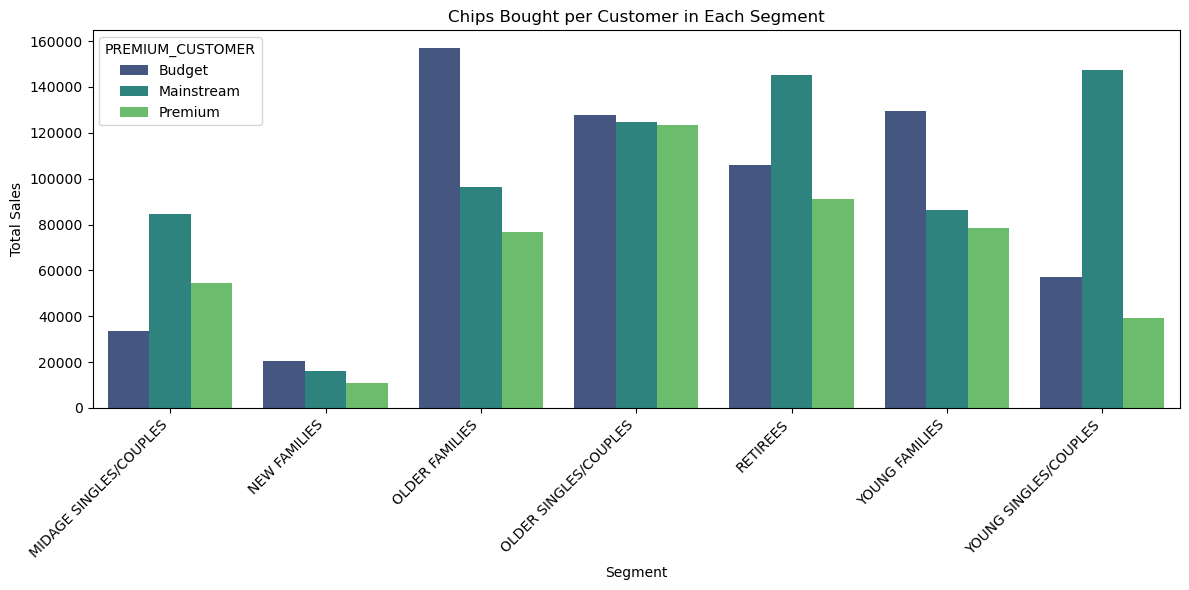

In [217]:
# Group the DataFrame by 'LIFESTAGE' and 'PREMIUM_CUSTOMER', and sum the total sales to get chips bought per customer by segment
chips_bought = merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index(name='CHIPS_BOUGHT')

# Plot the chips bought per customer by segment using sns.barplot
plt.figure(figsize=(12, 6))
sns.barplot(data=chips_bought, x='LIFESTAGE', y='CHIPS_BOUGHT', hue='PREMIUM_CUSTOMER', palette='viridis')
plt.title('Chips Bought per Customer in Each Segment')
plt.xlabel('Segment')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


*<span style="font-size:16px;">There are more Mainstream - young singles/couples and Mainstream - retirees who buy
chips. This contributes to there being more sales to these customer segments but
this is not a major driver for the Budget - Older families segment.
Higher sales may also be driven by more units of chips being bought per customer.
Let's have a look at this next.</span>*


**<span style="font-size:18px;">What's the average chip price by customer segment</span>**


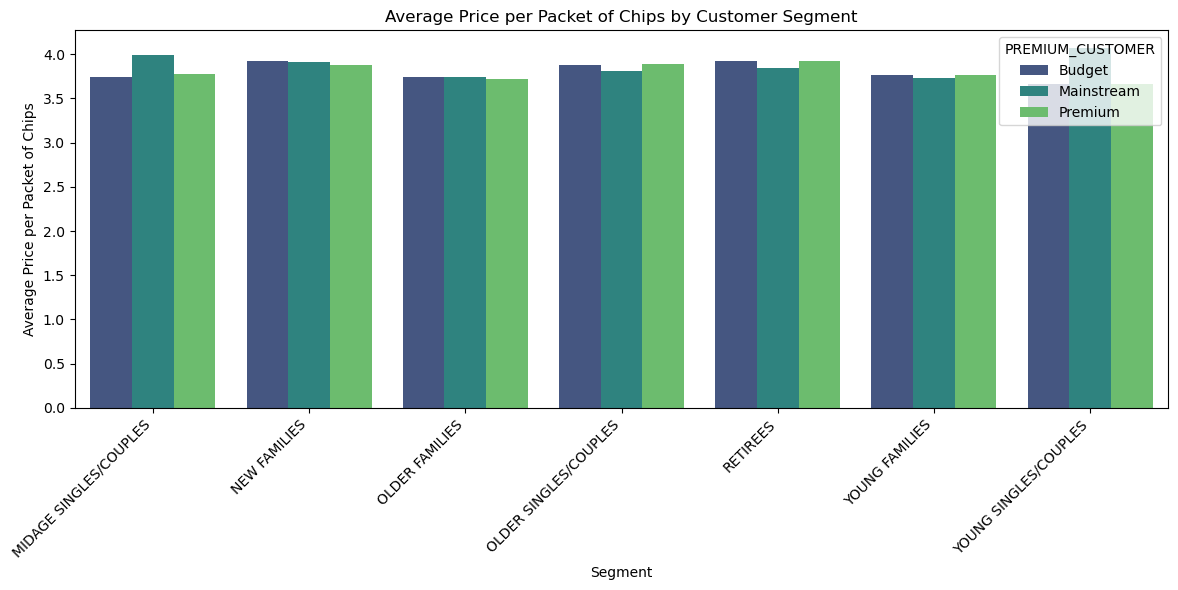

In [218]:
merged_df['AVERAGE_PRICE'] = merged_df['TOT_SALES'] / merged_df['PROD_QTY']

# Group the DataFrame by 'LIFESTAGE' and 'PREMIUM_CUSTOMER', and calculate the mean of the average price
average_price_by_segment = merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['AVERAGE_PRICE'].mean().reset_index()

# Plot the average price per packet of chips per customer segment using sns.barplot
plt.figure(figsize=(12, 6))
sns.barplot(data=average_price_by_segment, x='LIFESTAGE', y='AVERAGE_PRICE', hue='PREMIUM_CUSTOMER', palette='viridis')
plt.title('Average Price per Packet of Chips by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Average Price per Packet of Chips')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

*<span style="font-size:16px;">Mainstream midage and young singles and couples are more willing to pay more per
packet of chips compared to their budget and premium counterparts. This may be due
to premium shoppers being more likely to buy healthy snacks and when they buy
chips, this is mainly for entertainment purposes rather than their own consumption.
This is also supported by there being fewer premium midage and young singles and
couples buying chips compared to their mainstream counterparts.</span>*

*<span style="font-size:16px;">As the difference in average price per unit isn't large, we can check if this difference is statistically different</span>*

In [219]:
# Filter the DataFrame for mainstream midage and young singles and couples
mainstream = merged_df[(merged_df['LIFESTAGE'].isin(['MIDAGE SINGLES/COUPLES', 'YOUNG SINGLES/COUPLES'])) & 
                       (merged_df['PREMIUM_CUSTOMER'] == 'Mainstream')]['AVERAGE_PRICE']

# Filter the DataFrame for premium and budget midage and young singles and couples
premium_and_budget = merged_df[(merged_df['LIFESTAGE'].isin(['MIDAGE SINGLES/COUPLES', 'YOUNG SINGLES/COUPLES'])) & 
                               (merged_df['PREMIUM_CUSTOMER'] != 'Mainstream')]['AVERAGE_PRICE']

# Perform independent t-test
t_stat, p_value = ttest_ind(mainstream, premium_and_budget)

# Display the results
print("Independent t-test results:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

Independent t-test results:
T-statistic: 37.83196107667815
P-value: 2.235645611549355e-309


*<span style="font-size:16px;">The t-test results in a p-value of  2.235645611549355e-309 , i.e. the unit price for mainstream,young and mid-age singles and couples are significantly higher than that of budget or premium, young and midage singles and couples.</span>*

*<span style="font-size:16px;">We might want to target customer segments that contribute the most to sales to
retain them or further increase sales. Let's look at Mainstream - young singles/couples. For instance, let's find out if they tend to buy a particular brand of chips.</span>*

In [220]:
dfy = merged_df[(merged_df['LIFESTAGE']=='YOUNG SINGLES/COUPLES') & (merged_df['PREMIUM_CUSTOMER']=='Mainstream')]

In [221]:
dfy.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,AVERAGE_PRICE
221347,2018-08-16,1,1020,26,19,Smiths Crinkle Cut Snag&Sauce 150g,1,2.6,150,Smiths,YOUNG SINGLES/COUPLES,Mainstream,2.6
221348,2018-08-17,1,1163,188,46,Kettle Original 175g,1,5.4,175,Kettle,YOUNG SINGLES/COUPLES,Mainstream,5.4
221349,2018-08-14,1,1291,333,27,WW Supreme Cheese Corn Chips 200g,1,1.9,200,Woolworths,YOUNG SINGLES/COUPLES,Mainstream,1.9
221350,2019-05-15,3,3031,1227,14,Smiths Crnkle Chip Orgnl Big Bag 380g,1,5.9,380,Smiths,YOUNG SINGLES/COUPLES,Mainstream,5.9
221351,2019-05-18,3,3118,1574,62,Pringles Mystery Flavour 134g,1,3.7,134,Pringles,YOUNG SINGLES/COUPLES,Mainstream,3.7


In [222]:
brand_popularity = dfy.groupby('BRAND')['TOT_SALES'].sum().sort_values(ascending=False)

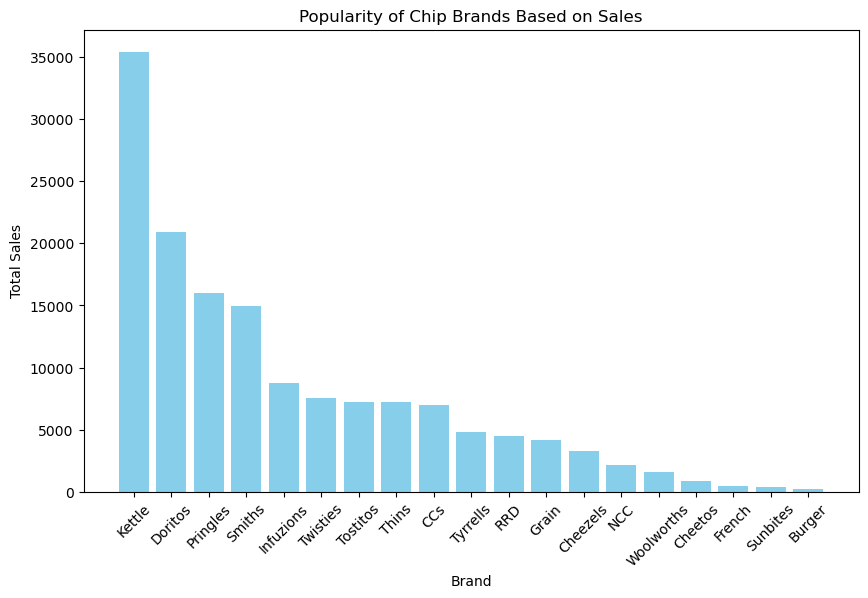

In [223]:
# Creating the bar chart
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
plt.bar(brand_popularity.index, brand_popularity.values, color='skyblue')
plt.xlabel('Brand')  # X-axis label
plt.ylabel('Total Sales')  # Y-axis label
plt.title('Popularity of Chip Brands Based on Sales')  # Chart title
plt.xticks(rotation=45)  # Rotate brand names for better visibility
plt.show()

*<span style="font-size:16px;">As we can see, the top three brands are Kettle, Doritos and Pringles</span>*

*<span style="font-size:16px;">Let's also find out if our target segment tends to buy larger packs of chips.</span>*

In [224]:
pack_size_counts = dfy['PACK_SIZE'].value_counts()

# Sorting index if pack sizes are numeric and you want them in order
pack_size_counts = pack_size_counts.sort_index()

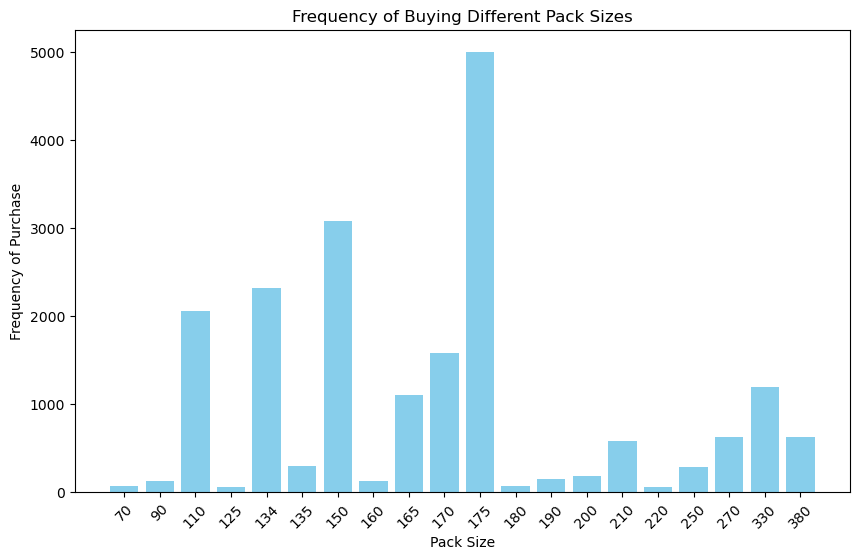

In [225]:
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
plt.bar(pack_size_counts.index.astype(str), pack_size_counts.values, color='skyblue')
plt.xlabel('Pack Size')  # Label for the x-axis
plt.ylabel('Frequency of Purchase')  # Label for the y-axis
plt.title('Frequency of Buying Different Pack Sizes')  # Title of the plot
plt.xticks(rotation=45)  # Rotate labels to avoid overlap if needed
plt.show()

*<span style="font-size:16px;">As we can see, the top pack size are 175g, 150g and 134g.</span>*

**<span style="font-size:20px;">Conclusion</span>**

*<span style="font-size:16px;">The data analysis of chip sales provides several key insights that can guide strategic decisions for maximizing sales and targeting specific customer segments effectively. Firstly, sales trends indicate a significant increase in purchases leading up to Christmas, peaking before a sharp drop on Christmas Day, attributed to store closures. This seasonal trend suggests the importance of enhancing supply and marketing efforts during the early December period to capitalize on the holiday shopping surge.</span>*

*<span style="font-size:16px;">In terms of customer demographics, "Older Families" within the "Budget" segment are the leading purchasers of chips, spending a total of $156,863.75. This indicates that despite the appeal of chips across various segments, older families on a budget represent a crucial target demographic because of their substantial contribution to sales.</span>*

*<span style="font-size:16px;">The analysis also reveals that "Mainstream - young singles/couples" and "Mainstream - retirees" are significant purchasers of chips. This trend is not solely based on the number of customers but is further amplified by the quantity of chips they purchase per transaction. This suggests a strong loyalty and preference within these segments, highlighting an opportunity for targeted marketing and tailored product offerings.</span>*

*<span style="font-size:16px;">Additionally, price sensitivity varies by demographic, with "Mainstream midage and young singles/couples" showing a willingness to pay more per packet compared to their "Budget" and "Premium" counterparts. This could be indicative of their lifestyle preferences and openness to premium-priced products for occasional indulgence or social gatherings. The statistical analysis supports this observation, indicating significant differences in unit prices paid by mainstream segments compared to others, which could influence product pricing strategies.</span>*

*<span style="font-size:16px;">The preference for specific brands and pack sizes within these key segments, especially among "Mainstream - young singles/couples," has been pinpointed to popular choices such as Kettle, Doritos, and Pringles, and preferred pack sizes include 175g, 150g, and 134g. This insight can guide inventory decisions and promotional activities aimed at increasing the visibility and appeal of these preferred choices in targeted segments.</span>*

*<span style="font-size:16px;">In conclusion, the insights derived from this analysis highlight the importance of strategic segmentation and targeted marketing. The data not only guides us on which segments to focus on but also reveals consumer preferences within those segments regarding product type, brand, and size. Retail strategies can be adjusted to prioritize these preferences to enhance customer satisfaction and loyalty, thereby driving sales growth.</span>*



